# Applications Session 1

Dr Valentina Erastova, valentina.erastova@ed.ac.uk

School of Chemistry, University of Edinburgh


Big thanks to [Matteo Degiacomi](https://degiacomi.org) (Durham University) and Hannah Pollak (PhD student and demonstrator on this course) for their input.

---




This is the first session of the two, where we focus on applying the learned material for chemistry related problems.

There are three parts to this workshop:

- In the first part of the session you will look at the [real Mass Spec data](#MSDATA) for some interesting molecules, visualise the structures, plot the data and find the peaks.

- In the second part you will learn about carbon isotopes, their [stability and radioactive decay](#RadDecay), and how we can use it to calculate the age of a given sample. 

- In the third part we will make a [Quiz](#Quiz), that could even be helpful for you to learn periodic table.

---

# TOC


### Application 1: [Real MassSpec of a Fun Molecule](#MSDATA)
- [Visualising Molecular Structure](#molec_view)
- [TASK 1 & 2 - Finding Peaks](#Task_Peaks)


### Application 2: [Radioactive Decay](#RadDecay)
- [Theoretical background - radiocarbon](#theory)
- [Exponential decay - Let's run a simulation](#simulation)
- [TASK 3 - Finding the half-life from the decay data collection](#Task_Halflife)


### Application 3: [Write a Chemistry Quiz](#Quiz)
- [What makes a good Quiz?](#whatis)
- [Structure of a Quiz](#structure_quiz)
- [TASK 4 & 5 - Write (and play) a Quiz](#Task_quiz)

---
<a class="anchor" id="teabags"></a>

# Application 1: Real MassSpec of a Fun Molecule
<a class="anchor" id="MSDATA"></a>


In this part we will use MassSpec data of some fun molecules!

By running the random task script, you will get:
- a name of one of the molecules, 
- a name of the text file containing the structure and MassSpec data,  
- a link to **The Molecule of the Month** page associated to your molecule.

**[The Molecule of the Month](http://www.chm.bris.ac.uk/motm/motm.htm)** website is created by [Prof Paul May from  Bristol University](http://www.bris.ac.uk/chemistry/people/paul-w-may) and holds information about some interesting molecules that we meet in our lives. 

For a detailed discussion of the history of this website, please see: P.W. May, S.A. Cotton, K. Harrison, H.S. Rzepa, The ‘Molecule of the Month’ website – an extraordinary chemistry educational resource online for over 20 years”, Molecules 22 (2017) 549-559. [doi: 10.3390/molecules22040549]

The MassSpec data for all the compounds is taken from [**MassBank**](https://massbank.eu/MassBank/). 
ACCESSION, RECORD_TITLE, DATE and AUTHORS are given in the comment section (lines starting with `#`) of the `MS_DATA/MS_*Molecule*.txt` file.

The structures are obtained from the [MolView](https://molview.org).


In [ ]:
###RANDOM TASK GENERATOR
import random

#some settings for colourful outout
class color:
   DCY = '\033[36m'
   MAG = '\033[35m'
   BOLD = '\033[1m'
   END = '\033[0m'
    
#list of molecules
molecule = ['Testosterone','BromoLSD','Cannabinol','Dexamethasone','Estradiol','Fluorescein','Lycopene','Melatonin','Quinine','Riboflavin','Strychnine']

#shortened dictionary of webpages, as all start with http://www.chm.bris.ac.uk/motm/
webshort = {'Riboflavin': '/vitaminB2/vitaminb2h.htm', 
	'Quinine': '/quinine/quinineh.htm',
	'Dexamethasone': '/dexamethasone/dexamethasoneh.htm',
	'Lycopene': '/lycopene/lycopeneh.htm',
	'Melatonin': '/DMT/dmth.htm',
	'BromoLSD': '/DMT/dmth.htm',
	'Testosterone': '/testosterone/testosteroneh.htm',
	'Fluorescein': '/rose-bengal/rose-bengalh.htm',
	'Cannabinol': '/cannabidiol/cannabidiolh.htm',
	'Estradiol': '/estradiol/estradiolh.htm',
	'Strychnine': '/strychnine/strychnineh.html'}

#get a random molecule
m=random.choice(molecule)

#locate associated webpage
w=webshort[m]

#output to screen
print("\n") #empty line
print(color.DCY + '    - * - * - * - * - * - * - !  !  ! - * - * - * - * - * - * -'+ color.END)
print("\n") #empty line
print(color.BOLD + color.DCY + 'Your molecule is', m,'!'+ color.END)
print('The structure file for your molecule %s is named MS_DATA/%s.mol'%(m, m))
print('The MassSpec data file for your molecule %s is named MS_DATA/MS_%s.txt'%(m, m))
print('Interesting facts about %s are on http://www.chm.bris.ac.uk/motm%s'%(m,w))
print("\n")
print(color.DCY + '    - * - * - * - * - * - * - !  !  ! - * - * - * - * - * - * -'+ color.END)

#notice how we can use different ways of 
#integrating variables m and w into a print statement
        

---

## 1.1 Visualising Molecular Structure
<a class="anchor" id="molec_view"></a>

let's start with visualisation of the molecule. For tis we can use `nglview`.  

Check the docs [here](http://nglviewer.org/nglview/latest/). And you may need to install `nglview` first.

In [ ]:
# do you need to install nglview?
#!pip install nglview

In [ ]:
# definitely need to import it
import nglview as nv

In [ ]:
#note m has been assigned a name of the molecule above
print(m)

# load the file
molecule = './MS_DATA/%s.mol' % m

visualize the molecule

In [ ]:
# visualise
molec = nv.show_file(molecule)
molec

In [ ]:
# add a surface
molec.add_surface(opacity=0.2)


In [ ]:
# colour by index
molec.color_by('atomindex')


if we want to change the representation completely, we need to first *clear the previous*, then add the new one

In [ ]:
# change representation
molec.clear_representations()
molec.add_hyperball(color='white')
molec.add_hyperball(selection='atom _O', color='red')

<details>
<summary> <mark> Commands used:</mark> </summary>
    
```python
import nglview as nv

# load the file
molecule = './MS_DATA/Caffeine.mol'
molec = nv.show_file(molec)
molec

# add a surface
molec.add_surface(opacity=0.2)

# colour by index
molec.color_by('atomindex')

# change representation
molec.clear_representations()
molec.add_hyperball(color='white')
molec.add_hyperball(selection='atom _O', color='red')
```
    
</details>

## 1.2 Finding Peaks on MS Data
<a class="anchor" id="peaks"></a>

<div class="alert alert-success">
    <b>TASK 1 - Finding peaks on your MassSpec </b> 
    
Load the data from .txt file named above 
    
Plot m/z vs intensity, find and mark maximum with a cross, add labels and legends, save the plot.

- Label the highest peak with its corresponding mass

- What is the difference between intensity and relative intensity ? Calculate relative intensity, make a corectly labelled plot.
    
- Using `scipy.signal.find_peaks` find all peaks on the data and mark them with a cross.
    
</div>


<div class="alert alert-info">
        <b>HINTS: </b>   

**Do you remember what molecule it was?**

The variable defining your molecule is `m`, you can print it in the terminal:

```python
print('Your molecule is %s, and the datafile is MS_DATA/MS_%s.txt' %(m,m))
```
---
    
**Do you know how your datafile looks like? What are the comments and the delimeters?**

Before loading the mass spectrum data into our notebook we should take a closer look at what the datafile looks like.

```python
!head -24 ./MS_DATA/filename.txt  
```
You should find that the file is has comments on the lines starting with '#'; the data is in 3 columns: m/z, intensity, relative intensity, separated by the white spaces.
    
---
**Do you need a help to load datafiles?**  

See Session 5 extra notebook [Pandas vs Numpy](../Session_05_stats_plotting/Pandas_NumPy.ipynb)

---
**Do you need a reminder on plotting?**  

See Session 5 extra notebook [Plotting](../Session_05_stats_plotting/Plotting.ipynb)

---
To **annotate your plot**:

you can use function `plt.annotate ('text', xy=(x,y) )` more [info here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html)
in the case of this example the text will be *m/z= VALUE* and can be expressed like this: `mz = %s'%maxval[0]` 
the possition is slightly offset from the peak itself `(maxval[0]+10, maxval[1]-50)` 

---
To **find peaks**:

package you have already seen `scipy.signal.find_peaks` manual [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

we will see that the input should look like this:
```python
peaks, _ = find_peaks(x) 

```
where `_` is used for an array that you will not use (see later details for this);
where `x` is our signal the other parameters are non-compulsory, but necessary for a good search.
</div>



In [ ]:
# Do you remember what is your molecule? 


In [ ]:
# Solution



<details>
<summary> <mark> SOLUTION on an example of Caffeine using numpy only:</mark> </summary>
   
```python

import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=12)

from scipy.signal import find_peaks

#load data
data = np.loadtxt("./MS_DATA/MS_Caffeine.txt", comments='#')

#assign columns to variable names
mz = data[:, 0]
intens = data[:, 1]
relintens = data[:, 2]

#find max in intensity and it's possition
maxpos = np.argmax(intens)
maxval = data[maxpos, :]
print('Max m/z is', maxval[0])

#find peaks
peaks, _ = find_peaks(relintens)
print('found', len(peaks), 'peaks')

#make a figure
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1, title="Caffeine MS - single peak")

#add data to the plot
plt.plot(mz, intens, '-', c='c', label='data')
plt.plot(maxval[0], maxval[1], 'X', c='r', label='peak')

#adding an value next to the peak
x = maxval[0] + 10  #shift x axis to the right by 10
y = maxval[1] - 50  #shift y axis down by 50
plt.annotate('m/z=%s' % maxval[0], xy=(x, y))

#plot legend with a location and label axis
plt.legend(loc='upper left')
plt.xlabel("m/z")
plt.ylabel("intensity")

#next plot
plt.subplot(1, 2, 2, title="Caffeine MS - top %s peaks" % (len(peaks)))
plt.plot(mz, relintens, '-', c='c', label='data')
plt.plot(data[peaks, 0], data[peaks, 2], 'X', c='r', label='peaks')

#label and adjust plot
plt.legend()
plt.xlabel("m/z")
plt.ylabel("relative intensity")
plt.subplots_adjust(wspace=0.3)

#save figure ans show the plot
plt.savefig("MS_Caffeine_MZ.png")
plt.show()
```
</details>

<details>

<summary> <mark> SOLUTION on an example of Caffeine using pandas:</mark> </summary>

```python    
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=12)

from scipy.signal import find_peaks

#load data and assign column labels
data = pd.read_csv("./MS_DATA/MS_Caffeine.txt",
                   sep='\s+',
                   comment='#',
                   names=['mz', 'I', 'relI'])

#select 'm/z' as the index column
data.set_index('mz', inplace=True)

# one option for finding maximum intensity and mz at that position
# use idxmax to select index where column 'I' is max
# use max for finding maximum in 'I' column
max_val = data['I'].idxmax()
max_pos = data['I'].max()
print(f'm/z of max I is {max_val}\n' f'max I is {max_pos}\n')

# find peaks in 'relI' column
peaks, _ = find_peaks(data['relI'])
print('found', len(peaks), 'peaks')

#make a figure
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1, title="Caffeine MS - single peak")

#add data to the plot
plt.plot(data.index, data['I'], '-', c='c', label='data')
plt.plot(max_val, max_pos, 'X', c='r', label='peak')

#adding an value next to the peak
x = max_val + 10  #shift x axis to the right by 10
y = max_pos - 50  #shift y axis down by 50
plt.annotate(f'm/z={max_val}', xy=(x, y))

#plot legend with a location and label axis
plt.legend(loc='upper left')
plt.xlabel("m/z")
plt.ylabel("intensity")

#next plot
plt.subplot(1, 2, 2, title="Caffeine MS - top %s peaks" % (len(peaks)))
plt.plot(data.index, data['relI'], '-', c='c', label='data')
plt.plot(data.iloc[peaks, 1].index,
         data.iloc[peaks, 1],
         'X',
         c='r',
         label='peaks')

#label and adjust plot
plt.legend()
plt.xlabel("m/z")
plt.ylabel("relative intensity")
plt.subplots_adjust(wspace=0.3)

#save figure ans show the plot
plt.savefig("MS_Caffeine_MZ.png")
plt.show()
```
    
</details>

---

<div class="alert alert-success">
    <b>TASK 2 - Optimise the Search </b> 
    
Optimise the search for peaks:
    
```python
scipy.signal.find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
```
the output will then also give a dictionary of various properties, according to the parameters passed.

Try 4 searches, setting the various height, threshold, distance, prominance and see how it affects the peak search, by plotting these next to each otheras 2x2 grid of subplots
    
</div>

In [ ]:
# Your Solution



<details>
<summary> <mark> SOLUTION on an example of Caffeine:</mark> </summary>
    
```python
import numpy as np

from scipy.signal import find_peaks

data = np.loadtxt("./MS_DATA/MS_Caffeine.txt", comments='#')

#lets use normalised data
intens = data[:, 2]

#define parameters the test
h = 20
p = 100
w = 1
t = 10

peaks1, properties1 = find_peaks(intens, height=h)
print('found', len(peaks1), 'peaks for height=', h)

peaks2, properties2 = find_peaks(intens, prominence=p)
print('found', len(peaks2), 'peaks for prominence=', p)

peaks3, properties3 = find_peaks(intens, height=h, width=w)
print('found', len(peaks3), 'peaks for hight = %s and width=%s' % (h, w))

peaks4, properties4 = find_peaks(intens, threshold=t)
print('found', len(peaks4), 'peaks for threshold=', t)

#plot it
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(data[peaks1, 0], data[peaks1, 2], "xr")
plt.plot(data[:, 0], data[:, 2], 'c')
plt.legend(['height'])

plt.subplot(2, 2, 2)
plt.plot(data[peaks2, 0], data[peaks2, 2], "xb")
plt.plot(data[:, 0], data[:, 2], 'c')
plt.legend(['prominence'])

plt.subplot(2, 2, 3)
plt.plot(data[peaks3, 0], data[peaks3, 2], "xm")
plt.plot(data[:, 0], data[:, 2], 'c')
plt.legend(['hight & width'])

plt.subplot(2, 2, 4)
plt.plot(data[peaks4, 0], data[peaks4, 2], "xk")
plt.plot(data[:, 0], data[:, 2], 'c')
plt.legend(['threshold'])

plt.savefig("MS_Caffeine_Peaks_compare.png")

plt.show()

```
</details>

**Feeling like you want to analyse and plot more data?**

There are a few more data files for you:

 - `MS_FC43pos.txt` Perfluorotributylamine (FC43), here as a possitive ion
 - `MS_FC43neg.txt` FC43 as a negative ion
 - `MS_PFK.txt` Perfluorokerosene (PFK)
 - `MS_FC70pos.txt` Perfluorotripentylamine (FC70) possitive
 - `MS_FC70neg.txt` FC70 negative ion
 - `MS_FAB.txt`
 - `MS_CsI.txt`

These are used as callibration compounds for the MassSpec.

<details>
<summary> <mark> SOLUTION example:</mark> </summary>
    
```python

#load data
data1 = np.loadtxt("./MS_DATA/MS_FC43pos.txt", comments='#')
data2 = np.loadtxt("./MS_DATA/MS_FC43neg.txt", comments='#')

#find max and min
maxpos1 = np.argmax(data1[:, 1])
maxval1 = data1[maxpos1, :]
maxpos2 = np.argmax(data2[:, 1])
maxval2 = data2[maxpos2, :]

#make a figure
plt.figure()

#make subplot, name the figure
plt.subplot(1, 1, 1, title="Perfluorotributylamine")

#add data to the plot
plt.plot(data1[:, 0], data1[:, 1], '.-', c='c', label='Positive Ion')
plt.plot(data2[:, 0], data2[:, 1], '.-', c='b', label='Negative Ion')
plt.plot(maxval1[0], maxval1[1], 'X', c='r', label='peaks')
plt.plot(maxval2[0], maxval2[1], 'X', c='r')

#labe  axis
plt.xlabel("m/z")
plt.ylabel("Rel. Abundance")

#plot legend with a location
#'upper/lower left/right/center' or 'center left/right'
plt.legend(loc='upper right')

#save figure
plt.savefig("MS_FC43.png")

plt.show()
```
</details>


---

[back to top](#teabags)




# Application 2: Radioactive Decay 
<a class="anchor" id="RadDecay"></a>

## 1.2 Theory <a class="anchor" id="theory"></a>


### Radiocarbon

**Isotopes** of an element share the same number of protons but have different numbers of neutrons. 
Each element has numerous isotopes, but only a few will be stable enough to be found naturally. 

For example, carbon, has:
 - two stable isotopes:
     - 98+% of total carbon is <sup>12</sup>C, and 
     - ~1% is <sup>13</sup>C (<sup>13</sup>C allows us to do NMR!)
 - one radioactive (i.e. capable of a decay into another element) <sup>14</sup>C, formed cosmogenically in small amounts.
 - further 12 isotopes are known, only stable on the sub-second timescales they have been produced artificially.

<img src="C_isotopes.jpg" width="800">




Since carbon-14 has one too many neutrons, it will undergo a $\beta^-$ decay into <sup>14</sup>N, where a neutron will decay into a proton, emitting an electron ($\beta$-particle) and an anti-neutrino, ν:

 <sub>6</sub><sup>14</sup>C  -> <sub>7</sub><sup>14</sup>N + e<sup>-</sup> +  ν
 
 
The amount of carbon-14 is constantly replenished through the reaction of nitrogen-14 in the atmosphere under exposure to the cosmic ray action: 

n + <sub>7</sub><sup>14</sup>N  -> <sub>6</sub><sup>14</sup>C + p<sup>+</sup>

Therefore, <sup>14</sup>C is a cosmogenic nuclide. However, open-air nuclear testing (between 1955 and 1980s) have also increased the amount of <sup>14</sup>C in the environment.

This carbon-14, reacts with oxygen, forming CO<sub>2</sub> and gets incorporated (photosynthesis, mixing, C-exchange) into various living species and natural materials. 

Decaying slowly with a halflife of 5730 years, it becomes ideal for dating materials up to 10 000 BC (Mesolithic age, when humans have still been mainly hunter/gatherers).




The method of radiocarbon dating was proposed by [Willard Libby](https://en.wikipedia.org/wiki/Willard_Libby) in 1949. Here is the figure from the original paper explaining the ages of various materials - 
J. R. Arnold & W. F. Libby, “Age Determinations by Radiocarbon Content: Checks with Samples of Known Age,” Science 110(2869), 678–680, 1949.

<img src="carbon_dating_libby.png" width="400">



**Want to learn more?**

-  [Shroud of Turin](https://en.wikipedia.org/wiki/Shroud_of_Turin) - a linen cloth, claimed to be the negative image of Jesus of Nazareth, as the cloth wrapped the body after crucifixion. In 1988, radiocarbon dating established that the shroud was from the Middle Ages, between the years 1260 and 1390.
P. E. Damon et al., [Radiocarbon Dating of the Shroud of Turin,](https://www.nature.com/articles/337611a0) Nature 337(6208), 611–615, 1989.

- [Bakhshali Manuscript](https://en.wikipedia.org/wiki/Bakhshali_manuscript) which contains the earliest known Indian use of a zero symbol. Nevertheless, there has been some debates on the age of the manuscript.

- J. Van der Plicht et al., [Recent Developments in Calibration for Archaeological and Environmental Samples](https://www.cambridge.org/core/journals/radiocarbon/article/recent-developments-in-calibration-for-archaeological-and-environmental-samples/671DCC8A4A38ACF57786EFC659E5D8F6). Radiocarbon, 62(4), 1095-1117, 2020.



### Radioactive Decay 
<a class="anchor" id="Simulation"></a>

The decay itself is exponential - the number of particles, $N$, at a given moment in time, $t$, can be calculated as:

$ N=N_0 e^{-\lambda t}$ , 

where $\lambda$ is the decay constant, $N_0$ is the number of particles at the start, i.e. at $t=0$.


The halflife, $\tau$, of a material is the time it takes for the half of radioactive particles to decay:

$\tau = \frac{\ln(2)}{\lambda}$ .

Let's see this in action with a simulation bellow.



------

[back to top](#teabags)

## 2.2 Simulating Radioactive Decay
Adapted from: [Wired](https://www.wired.com/2017/04/lets-model-radioactive-decay-show-carbon-dating-works) written by Rhett Allain.


A material made of element **X** is composed from <span style="color:blue">**stable blue particles**</span> and  <span style="color:red">**radioactive red particles**</span>, which decay into a new element **Y**, <span style="color:cyan">**stable cyan particles**</span>.

The total amount of particles forming material is 500 element **X**, out of which 34.4% are radioactive. 

The decay rate for the <span style="color:red">**X**</span> --> <span style="color:cyan">**Y**</span> is 1/3, i.e a particle has 33.3(3)% chance to decay over a given unit of time.

Below, we calculate what happens over the 1000 time units, and we will run the calculation with a step of 5 time units.


There will be a large print out of the code, change the cell view by:

    Cell tab -> All Outputs -> Toggle Scrolling



You likely need to install [vpython](https://www.glowscript.org/docs/VPythonDocs/index.html) installed:
```python
!pip install vpython
```

In [ ]:
#!pip install vpython

In [3]:
# INPUTS FOR THE DECAY

#N is the total number of atoms
N = 500

#N2 is number of atoms that can decay
N2 = 0.344 * N  #0.344 is 34.4%. You could try changing this

#instead of steps, I am using t for time. simulation will run untill tmax
t = 0
tmax = 1000

#dt is the time interval. it is set to 5 time units. You could try changing this
dt = 5

#r is the decay rate - the probability that one atom decays at time interval dt
r = 1 / 3 # rate of 1/3, is a decay chance of 33.3%. You could try changing this


########## PROGRAM BELLOW ###########
# Adapted from Rhett Allain

from vpython import *
# This is needed in Jupyter notebook and lab to make programs glowscript programs rerunnable
canvas(title='<b>Decay Simulation</b>', background=color.white, height=400)  

#Build initial system
atoms = []
atoms2 = []

#n and n2 are counters
n = 0
while n <= (N - N2):
    atoms = atoms + [ sphere(pos=vector(3 * (random() - 1), (3 * random() - 1), 0),
               radius=0.05, color=color.blue, opacity=0.3) ]
    n = n + 1

n2 = 0
while n2 <= N2:
    atoms2 = atoms2 + [ sphere(pos=vector(3 * (random() - 1), (3 * random() - 1), 0),
               radius=0.05, color=color.red) ]
    n2 = n2 + 1

print("Total no. of atoms is %s" %(N))
print( "%.2f%% of them are unstable (=red)," %(N2 * 100 / N))
print ("i.e. at the start of simulation, t=0, there are %i unstable atoms \n " % (N2))

#decay is the number of things that have decayed, starts with 0
decay = 0

#this part makes a graph
g1 = graph(title='<b>Decay plot</b>', xtitle='time',
           ytitle='No. of particles per type', width=600, height=400, fast=False)

f1 = gdots(graph=g1, color=color.blue, radius=3) #points on the plot
#f2 = gcurve(graph=g1) # add a line plot
f3 = gdots(graph=g1, color=color.red, radius=3)
#f4 = gcurve(graph=g1) 
f5 = gdots(graph=g1, color=color.cyan, radius=3)
#f6 = gcurve(graph=g1) 

#add initial data to graph
f1.plot(t, N)
f3.plot(t, N2)
f5.plot(t, decay)

#the following is a loop to go through each item for decay
#this runs as long as t is less than tmax
while t < tmax:
    #rate(10) means display ten loops per second
    rate(10)

    #this goes through each atom in the list and decides if it decays
    for i in atoms2:
        #temp is a random number between 0 and 1. temperature can be thought of as a probability
        temp = random()

    #if it decays, do two things:
    if temp < r:
        #1-make the atom change colour
        i.color = color.cyan
        #i.emissive=True
        #i.visible=False
        #2-remove it from the atom list, add to decay list
        atoms2.remove(i)
        decay = decay + 1
    
    #increase time by one time interval step
    t = t + dt
    
    #add a data point to the graph
    f1.plot(t, (len(atoms2) + len(atoms)))
    #f2.plot(t, (len(atoms2) + len(atoms)))
    f3.plot(t, (len(atoms2)))
    #f4.plot(t, (len(atoms2)))
    f5.plot(t, decay)
    #f6.plot(t, decay)

#prints the number of atoms that decayed at the end of the simulation
print("%s of unstable atoms (=red) have decayed (=cyan) by the t = %s " %(decay, t))
print("There are still %s atoms that can decay " %(len(atoms2)))

<IPython.core.display.Javascript object>

Total no. of atoms is 500
34.40% of them are unstable (=red),
i.e. at the start of simulation, t=0, there are 172 unstable atoms 
 
70 of unstable atoms (=red) have decayed (=cyan) by the t = 1000 
There are still 103 atoms that can decay 


----
[back to top](#teabags)
## 2.3 Fitting radioactive decay
Adapted from: Christian Hill, [The Second Edition of Learning Scientific Programming with Python](https://www.cambridge.org/sj/academic/subjects/physics/mathematical-methods/learning-scientific-programming-python-2nd-edition?format=PB), ISBN: 9781108745918, published by Cambridge University Press in Nov 2020.

<a class="anchor" id="Task_Halflife"></a>


<div class="alert alert-success">
    <b>TASK 3 - Fit <sup>14</sup>C decay datasets to find half-life $\tau$  </b> 
    
The dataset `14C_MC_sim.csv` contains a set of individual decay datapoints for carbon-14 over a series of time. 

 - Load the data (is it commented? are comments useful? what are the separators?)
 - How many sets are there?
 - Fit the data to obtain $\tau$ and $N_0$
 - Plot the fit, as well as the average and standard deviation OR the collection of all datasets.

</div>  




<div class="alert alert-info">
        <b>HINTS: </b>   

- Average individual simulation datapoints along the colums to use for the fitting: 
```python
N = Data.mean(axis=1)
```
- You can calculate STD to plot it as an error bar:
```python
plt.errorbar(t, N, err)
```
- Profit from converting and exponential decay into a linear relation:
    
&nbsp;&nbsp;&nbsp; $ N = N_0 ~ exp\left(\frac{-t}{\tau}\right) $  &nbsp;   &nbsp;&nbsp;  =>   &nbsp; &nbsp;&nbsp;     $ln(N) = ln(N_0) \frac{-t}{\tau} $
    
- use [`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) function to perform a linear least-squares fit  
- OR use non-linear least squares fit, i.e. [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit to the exponential function directly. Don't forget to..
    
```python
from scipy.optimize import curve_fit
```

</div>   
    
 


Fitted parameters: N_0 = 498.8 tau = 5604.9 years


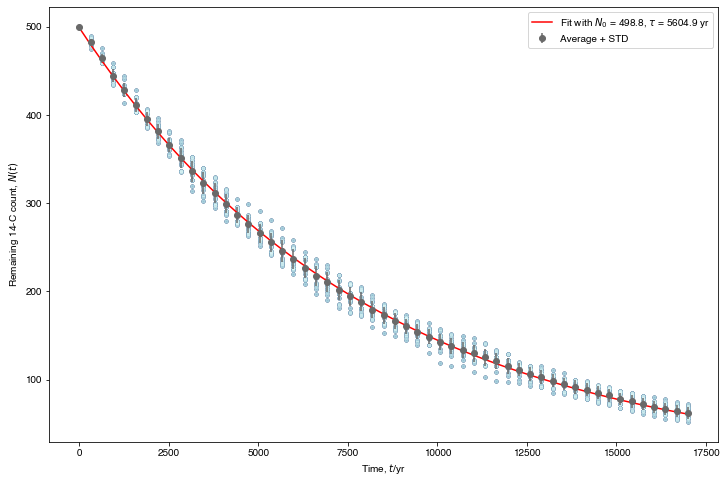

In [4]:
# Your solution
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rc('font', family='Helvetica', size=14)
import cmocean
cm = cmocean.cm.ice

# Load in the data and separate into a time column, tgrid, and columns of
# simulation runs, Nsim. 
arr = np.loadtxt('14C_MC_sim.csv', delimiter=',')
tgrid = arr[:, 0]
npts = len(tgrid)
Nsim = arr[:, 1:]
# Average Nsim for each time point.
N = Nsim.mean(axis=1)
Nstd = Nsim.std(axis=1)


# Least-squares fit to log(N) as a function of t: should be a straight line
def decay(t, N0, tau):
    return N0 * np.exp(-t / tau)


# Initial guesses: estimate tau from the noisy data or a linear fit to log(N)
p0 = N[0], 8000
popt, pcov = curve_fit(decay, tgrid, N, p0)
N0, tau = popt

# Report N0 and the half-life
thalf = np.log(2) * tau
print('Fitted parameters: N_0 = %.1f tau = %.1f years' % (N0, thalf))
NFit = N0 * np.exp(-tgrid / tau)

# PLOT
plt.figure(figsize=(12, 8))

# Plot the averaged data and the fit curve
colors = cm(np.linspace(0, 1, arr.shape[1]))
for i in range(arr.shape[1]):
    plt.plot(tgrid, Nsim[:, 1:], '.', alpha=0.2, c=colors[i])

plt.errorbar(tgrid, N, Nstd, fmt='o', c='dimgrey', label='Average + STD')

# Plot the fit
plt.plot(tgrid,
         NFit,
         c='r',
         label=r'Fit with $N_0$ = %.1f, $\tau$ = %.1f yr' % (N0, thalf))
plt.legend()
plt.xlabel('Time, $t$/yr')
plt.ylabel('Remaining 14-C count, $N(t)$')
plt.savefig('decay-fit-nonlinear.png')
plt.show()


<details>
<summary> <mark> SOLUTION example:</mark> </summary>
    
```python


#load libraries and make some pretty settings
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rc('font', family='Helvetica', size=14)
import cmocean
cm = cmocean.cm.ice

# Load in the data and separate into a time column, tgrid, and columns of
# simulation runs, Nsim. 
arr = np.loadtxt('14C_MC_sim.csv', delimiter=',')
tgrid = arr[:, 0]
npts = len(tgrid)
Nsim = arr[:, 1:]
# Average Nsim for each time point.
N = Nsim.mean(axis=1)
Nstd = Nsim.std(axis=1)


# Least-squares fit to log(N) as a function of t: should be a straight line
def decay(t, N0, tau):
    return N0 * np.exp(-t / tau)


# Initial guesses: estimate tau from the noisy data or a linear fit to log(N)
p0 = N[0], 8000
popt, pcov = curve_fit(decay, tgrid, N, p0)
N0, tau = popt

# Report N0 and the half-life
thalf = np.log(2) * tau
print('Fitted parameters: N_0 = %.1f tau = %.1f years' % (N0, thalf))
NFit = N0 * np.exp(-tgrid / tau)

# PLOT
plt.figure(figsize=(12, 8))

# Plot the averaged data and the fit curve
colors = cm(np.linspace(0, 1, arr.shape[1]))
for i in range(arr.shape[1]):
    plt.plot(tgrid, Nsim[:, 1:], '.', alpha=0.2, c=colors[i])

plt.errorbar(tgrid, N, Nstd, fmt='o', c='dimgrey', label='Average + STD')

# Plot the fit
plt.plot(tgrid,
         NFit,
         c='r',
         label=r'Fit with $N_0$ = %.1f, $\tau$ = %.1f yr' % (N0, thalf))
plt.legend()
plt.xlabel('Time, $t$/yr')
plt.ylabel('Remaining 14-C count, $N(t)$')
plt.savefig('decay-fit-nonlinear.png')
plt.show()
```
</details>

---

[back to top](#teabags)

# Application 3: Write an Interactive Chemistry Quiz Application
<a class="anchor" id="Quiz"></a>
    


## 3.1 Components of a Good Quiz Application <a class="anchor" id="whatis"></a>


In [6]:
from IPython.display import HTML, IFrame
HTML('<iframe src=https://www.menti.com/alikv3cbwjwt/embed width=700 height=900></iframe>')

/Users/valentina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [7]:
HTML('<iframe src=https://www.mentimeter.com/app/presentation/al9q2arbho621ads5j496qsweyx3nirh/embed width=700 height=400></iframe>')

### Prerequisites of a good Quiz application:

1. What do you want to test? What questions should you ask? How to make them non-ambiguous?
2. What are the rules of the Quiz? State them clearly.
3. Make the application user friendly, communicate to the player, interactivity is key.
4. Make sure the application is bombproof - user will make mistakes, and should be able to restart.
5. Keep the code organised: use lists/tuples/dictionaries.
6. Make sure you are not revealing information you test to the player (esp if running from a Jupyter Notebook, where code is displayed) - hide the data you test against into a file.
7. Check conditions you test with ```if``` statements.
8. Repeat actions with the ```for```/```while``` loops.
9. Use functions!
10. Make your code flexible, easy to expand - odds are you will be keen to add new functionality.
11. Keep testing by playing!

----


## 3.2 Making a Quiz <a class="anchor" id="structure_quiz"></a>

Let's create a quiz that will test the player on their knowledge of periodic table of elements - very chemistry Quiz!

### Step 1: Ask your Question 

Make sure to suggest the options for the answer:

``` python
startgame = input('Are you ready to start the Game? [Y/n]')
```

Act on the instructions (=answer) received you will need an `if` statement. 

Remain flexible with the answer! While suggested `Y` the use could have not paid attention and put a small `y` instead. Nevertheless, any other letter should be assumed as attempt to quit

```python
if startgame.lower()[0] != 'y':
    sys.exit('Quitting...')
```

In [8]:
# TRY HERE




### Step 2:  Check the Answer against some Data

Hide the questions and answers behind the code into a file. 

For example, here we can use this a datafile, containing the information on periodic table:
```python
ptable = pd.read_csv('ptable.csv')
```
<br>

Ask the question using the datafile. Here, `random` is a handy function to randomise the questions (like used in the Application 1)
```python
randel = random.randint(0, 117)

element = ptable.iloc[randel]
    
print('What is the name of an element %s ? ' %element['symbol'])
answer = input('')
```
<br>

Check the answer against the datafile. Here you will need an `if` statement.

Don't forget the feedback! Even if the user is wrong, it would be good to give them the correct answer! 

```python
if answer.lower() == element['name'].lower():
    # feedback
    print('Correct!')
    
else:
    # feedback, incl correct answer!
    print('Wrong, it is %s ' %element['name'])
```
 

In [ ]:
# TRY HERE


    

### Step 3: No Quiz is good without a score!

Add a count for the score and keep track!
```python
# set the counters
score = 0

ptable = pd.read_csv('ptable.csv')

randel = random.randint(0, 117)
element = ptable.iloc[randel]
print('What is the name of an element %s ? ' %element['symbol'])
answer = input('')

# check the answer
if answer.lower() == element['name'].lower():
    print('Correct!')
    #update the score
    score += 1 
    
else:
    print('Wrong, it is %s ' %element['name'])

```


In [9]:
# Want to try? or edit the code in the cell above



### Step 4: Make Sure the Quiz is Not Infinite and User Can Exit

Even the best quiz has to come to an end! 

Ask the user how many Questions they want to play, set the counter as a loop.

```python
# Ask how many questions to set, input should be an intiger!
qcount = int(input('How many questions do you want to brave this time?'))

# print out to confirm
print ('> You have chosen to do %s questions' %qcount)

#set the counter 
questions = 0

# start the loop over the number of questions player wants to answer
for i in range(0, qcount):
    
    if answer.lower() == element['name'].lower():
        print('Correct!')
        score += 1 
        questions += 1
    
    else:
        print('Wrong, it is %s ' %element['name'])   
        questions += 1
```

<br>

Make sure you have given clear instructions for the game.  
```python
print ('I will give you an element, and you will write its symbol. ')
print ('Answers are not case sensitive')
```
<br>

Add a functionality of exiting at any time, and getting the score. This can be within the loop, testing the answers:

```python
print ('You can exit any time by typing `quit`')

# check the answer
if answer.lower() == element['name'].lower():
    print('Correct!')
    score += 1 
    questions += 1
    
elif answer.lower() == 'quit':
    print('You got %s out of %s questions!'%(score, questions))
    #get out of the loop
    break
    
else:
    print('Wrong, it is %s ' %element['name'])
```
Now, let's put this all the elements together in a Quiz!



-----
[back to top](#teabags)


## 3.3 Write (and play) your Quiz<a class="anchor" id="Task_quiz"></a>
Adopted from: [replit.com/@IsaacCHITTILAPP](https://replit.com/@IsaacCHITTILAPP)


<div class="alert alert-success">
    <b>TASK 4 - Write a quiz about periodic table of elements  </b> 
    
 - Use [`mendeleev`](https://mendeleev.readthedocs.io/en/stable/) package to get data on the element, its name and atomic number,<br >
    
 - or load the datafile `ptable.csv`, already containing the columns 'symbol', 'name', 'atomic_number' for all 117 elements.<br>
    
 - Make sure the game is interactive:<br>
  ```How many questions would you like to attempt? ...```<br>
    
 - Print to the screen to confirm you read in the info right:<br>
    ```> You have chosen to do X questions```<br>
    
 -  Create tests for the input by the user. Did they type in an integer where they should have?
 
 - Provide instructions and how to get out:<br>
    ```Answers are not case sensitive```<br>
    ```type `quit` at any time to stop the game and get your score``` <br>
    
 - Keep playing, bombproofing your code and adding extra features!  
    
</div>  

In [ ]:
# anything you need to import? 
import random
import mendeleev as mv
import pandas as pd
import sys


In [ ]:
# gather data - use mendeleev? 
# what information would you want to include/test?
cols = [ 'symbol', 'name', 'atomic_number']
ptable = mv.get_table('elements')[cols]

# or you can load the ptable.csv datafile prepared for you
#pt = pd.read_csv('ptable.csv')

In [10]:
# YOUR QUIZ





<details>
<summary> <mark> SOLUTION example:</mark> </summary>
    
```python
import random
import mendeleev as mv
import pandas as pd
import sys

cols = [ 'symbol', 'name', 'atomic_number']
ptable = mv.get_table('elements')[cols]


startgame = input('Are you ready to start the Game? [Y/n]')

# test if they answerred Y or y, any other letter quit
if startgame.lower()[0] != 'y':
    sys.exit('Quitting...')

# Give instructions
print('I will give you an element, and you will write its symbol. ')
print('Answers are not case sensitive, and you can exit any time by typing `quit`')

# Ask how many qestions to set, input should be an intiger
qcount = int(input('How many questions do you want to brave this time?'))
# print out to confirm
print('> You have chosen to do %s questions' % qcount)

# set the counters
score = 0
questions = 0

# start the loop over the number of questions player wants to answer
for i in range(0, qcount):

    # get random number
    randel = random.randint(0, 117)

    # set the question:
    print('What is the name of an element %s ? ' %
          ptable.iloc[randel]['symbol'])

    # await the answer in the new line
    answer = input('')

    # check the answer
    # Does it match (make sure both are set to lower case to not be case-sencitive)
    if answer.lower() == ptable.iloc[randel]['name'].lower():
        # feedback
        print('Correct!')
        # update counts
        score += 1
        questions += 1

    # don't forget, the player may want to quit now!
    elif answer.lower() == 'quit':
        # feedback
        print('You got %s out of %s questions!' % (score, questions))
        #get out of the loop
        break

    # what else can happen? the answer is wrong!
    else:
        # feedback, incl correct answer!
        print('Wrong, it is %s ' % ptable.iloc[randel]['name'])
        #update the question number counter, the score stays the same
        questions += 1

#end the loop,
print('You got %s out of %s questions!' % (score, questions))
```
</details>

<div class="alert alert-success">
    <b>TASK 5 - make the Quiz multi difficulty-level </b> 
    
 - create tests for the input by the user. Did the player type in an integer where they should have?
 
 - create levels of difficulty for the player, for example:<br>
    ```Level 1: Gives you an element symbol, and you must give the element name```<br>
    ```Level 2: The same as difficulty 1 but it also asks you for the atomic number```<br>
    ```Level 3: Gives you the atomic number and you have to give the element name and symbol```<br>
    
 - Keep playing and adding extra features!
        
</div>  

In [ ]:
# playground for while you code 




In [ ]:
# your code 





<details>
<summary> <mark> SOLUTION example - more advanced:</mark> </summary>
    
```python
import numpy as np
import random
import mendeleev as mv
import pandas as pd
import sys

cols = [ 'symbol', 'name', 'atomic_number']
ptable = mv.get_table('elements')[cols]


startgame = input('Are you ready to start the Game? [Y/n]')

if startgame.lower()[0] != 'y':
    sys.exit('Quitting...')
    
# Give instructions
print ('')
print ('I will give you an element, and you will write its symbol. ')
print ('')
print ('Answers are not case sensitive, and you can exit any time by typing `quit`')
print ('')
print ('Level 1: Gives you an element symbol, and you must give the element name')
print ('')
print ('Level 2: The same as difficulty 1 but it also asks you for the atomic number')
print ('')
print ('Level 3: Gives you the atomic number and you have to give the element name and symbol')
print ('')

# ask what level
level = input('Choose difficulty level 1, 2 or 3 : ')

#test the answer is within the range
if int(level[0]) < 4:
    print ('> You have chosen level %s' %level )
    print ('')
else:
    print ('> You have chosen level above possible' )
    level = input('Try again and choose difficulty level 1, 2 or 3 : ')
    print ('')
    if int(level[0]) < 4:
        print ('> You have chosen level %s' %level )
        print ('')
    else:
        print ('> You have chosen level above possible. There is no hope in you' )
        sys.exit('Quitting...')
        

# Ask how many qestions to set
qcount = int(input('How many questions do you want to brave this time?'))
print ('> You have chosen to do %s questions' %qcount)
print ('')
    
    
# set the counters
score = 0
questions = 0


# start a loop of Qs depending on the level:

    
if level == '1':
    # start the loop over the number of questions player wants to answer
    for i in range(0, qcount):
        # get random number
        randel = random.randint(0, 117)
        
        # set the question:
        print('What is the name of an element %s ? ' %ptable.iloc[randel]['symbol'])
        
        # await the answer
        answer = input('')
    
        # check the answer
        # Does it match (make sure both are set to lower case to not be case-sencitive)
        if answer.lower() == ptable.iloc[randel]['name'].lower():
            # feedback
            print('Correct!')
            # update counts
            score += 1
            questions += 1
            
            
        # don't forget, the player may want to quit now! 
        elif answer.lower() == 'quit':
            # feedback
            print('You got %s out of %s questions!'%(score, questions))
            #get out of the loop
            break
            
        # what else can happen? the answer is wrong!
        else:
            # feedback, incl correct answer!
            print('Wrong, it is %s ' %ptable.iloc[randel]['name'])
            #update the question number counter, the score stays the same
            questions += 1
            
    #end the loop,         
    print('You got %s out of %s questions!'%(score, questions))


elif level == '2':
    for i in range(0, qcount):
        randel = random.randint(0, 117)
        
        print('What is the name of an element %s ? ' %ptable.iloc[randel]['symbol'])
        
        answer = input('Name:')
        
        if answer.lower() == ptable.iloc[randel]['name'].lower():
            print('Correct!')
            
            print('What is the atomic number of an element %s ? ' %ptable.iloc[randel]['symbol'])
            answer = int(input('Atomic number: '))
            
            
            #check if correct
            if answer == ptable.iloc[randel]['atomic_number']:
                print('Correct again!')
                score += 1
                questions += 1

            elif answer == 'quit':
                print('You got %s out of %s questions!'%(score, questions))
                break

            else:
                print('Wrong, it is %s ' %ptable.iloc[randel]['atomic_number'])                    
                questions += 1

        elif answer.lower() == 'quit':
            print('You got %s out of %s questions!'%(score, questions))
            break
            
        else:
            print('Wrong, it is %s ' %ptable.iloc[randel]['name'])
            questions += 1
            
    print('You got %s out of %s questions!'%(score, questions))
        
  

elif level == '3':
    for i in range(0, qcount):
        randel = random.randint(0, 117)
        
        print('What is the name of an element number %s ? ' %ptable.iloc[randel]['atomic_number'])
        
        answer = input('Name: ')
        
        if answer.lower() == ptable.iloc[randel]['name'].lower():
            print('Correct!')
            
            print('What is the symbol of an element number %s ? ' %ptable.iloc[randel]['atomic_number'])
            answer = input('Symbol: ')
            
            
            #check if correct
            if answer.lower() == ptable.iloc[randel]['symbol'].lower():
                print('Correct again!')
                score += 1
                questions += 1

            elif answer.lower() == 'quit':
                print('You got %s out of %s questions!'%(score, questions))
                break

            else:
                print('Wrong, it is %s ' %ptable.iloc[randel]['name'])                    
                questions += 1

        elif answer.lower() == 'quit':
            print('You got %s out of %s questions!'%(score, questions))
            break
            
        else:
            print('Wrong, it is %s, %s ' %(ptable.iloc[randel]['name'], ptable.iloc[randel]['symbol']))
            questions += 1
            
    print('You got %s out of %s questions!'%(score, questions))
    
else:
    print('this is not a level')
    
```
</details>

<div class="alert alert-info">
<b> Have you made a cool code and want to share it with others? </b>
    <br>
- Upload to GitHub <br>
- or convert into a trinket.io or replit.com and embed into a website/Learn page <br>
</div>  

---

[back to top](#teabags)


# Give us Feedback Please!

In [6]:
HTML('<iframe src=https://www.menti.com/aljarwxn8wdu/embed width=700 height=600></iframe>')



## THANK YOU!